# Install tensorflow


In [35]:
! pip install tensorflow

# Import tensorflow


In [36]:
import tensorflow as tf

## set the setting with the v1 compatibility


In [44]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [38]:
hello = tf.constant("Hello TensorFlow!")
sess = tf.Session()
print(sess.run(hello))

b'Hello TensorFlow!'


In [39]:
import tensorflow as tf
x = 2
y = 3
z = tf.add(x, y, name='Add')
print(z)

Tensor("Add_1:0", shape=(), dtype=int32)


## Direct dependencies


In [40]:
a = tf.multiply(8, 5)
b = tf.multiply(a, 1)
print(a, b)

Tensor("Mul_4:0", shape=(), dtype=int32) Tensor("Mul_5:0", shape=(), dtype=int32)


## Indirect dependencies


In [41]:
a = tf.multiply(8, 5)
b = tf.multiply(4, 3)
print(a, b)

Tensor("Mul_6:0", shape=(), dtype=int32) Tensor("Mul_7:0", shape=(), dtype=int32)


In [42]:
graph = tf.Graph()
with graph.as_default():
    z = tf.add(x, y, name='Add')

In [45]:
# create session
sess = tf.Session()

In [46]:
a = tf.multiply(3, 3)
print(a)

Tensor("Mul_8:0", shape=(), dtype=int32)


In [49]:
a = tf.multiply(3, 3)
with tf.Session() as sess:
    print(sess.run(a))

9


# Variables


In [52]:
x = tf.Variable(13)
print(x)

<tf.Variable 'Variable_1:0' shape=() dtype=int32_ref>


In [55]:
W = tf.Variable(tf.random_normal([500, 111], stddev=0.35), name="weights")
print(W)

<tf.Variable 'weights_2:0' shape=(500, 111) dtype=float32_ref>


In [58]:
W2 = tf.Variable(weights.initialized_value(), name="weights_2")

NameError: name 'weights' is not defined

In [57]:
tf.global_variables_initializer()

<tf.Operation 'init' type=NoOp>

In [60]:
x = tf.Variable(1212)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(x))

1212


In [61]:
W3 = tf.get_random_normal_variable(
    name='weights', shape=[500, 111], initializer=random_number_initializer())

AttributeError: module 'tensorflow.compat.v1' has no attribute 'get_random_normal_variable'

# Handwritten digits classification using TensorFlow


## Import required libraries

As a first step, let us import all the required libraries:


In [ ]:
import warnings
warnings.filterwarnings('ignore')


import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
tf.logging.set_verbosity(tf.logging.ERROR)

import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
print(tf.__version__)

2.17.0


## Load the Dataset

In the below code, "data/mnist" implies the location where we store the MNIST dataset.
one_hot=True implies we are one-hot encoding the labels (0 to 9):


In [ ]:
mnist = input_data.read_data_sets("data/mnist", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/mnist/t10k-labels-idx1-ubyte.gz


Let's check what we got in our data:


In [ ]:
print("No of images in training set {}".format(mnist.train.images.shape))
print("No of labels in training set {}".format(mnist.train.labels.shape))

print("No of images in test set {}".format(mnist.test.images.shape))
print("No of labels in test set {}".format(mnist.test.labels.shape))

No of images in training set (55000, 784)
No of labels in training set (55000, 10)
No of images in test set (10000, 784)
No of labels in test set (10000, 10)


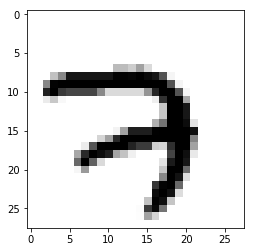

In [ ]:
img1 = mnist.train.images[0].reshape(28, 28)
plt.imshow(img1, cmap='Greys')

## Define the number of neurons in each layer


In [ ]:
# number of neurons in input layer
num_input = 784

# number of neurons in hidden layer 1
num_hidden1 = 512

# number of neurons in hidden layer 2
num_hidden2 = 256

# number of neurons in hidden layer 3
num_hidden_3 = 128

# number of neurons in output layer
num_output = 10

## Defining placeholders


In [ ]:
with tf.name_scope('input'):
    X = tf.placeholder("float", [None, num_input])

with tf.name_scope('output'):
    Y = tf.placeholder("float", [None, num_output])

In [ ]:
with tf.name_scope('weights'):

    weights = {
        'w1': tf.Variable(tf.truncated_normal([num_input, num_hidden1], stddev=0.1), name='weight_1'),
        'w2': tf.Variable(tf.truncated_normal([num_hidden1, num_hidden2], stddev=0.1), name='weight_2'),
        'w3': tf.Variable(tf.truncated_normal([num_hidden2, num_hidden_3], stddev=0.1), name='weight_3'),
        'out': tf.Variable(tf.truncated_normal([num_hidden_3, num_output], stddev=0.1), name='weight_4'),
    }

In [ ]:
with tf.name_scope('biases'):

    biases = {
        'b1': tf.Variable(tf.constant(0.1, shape=[num_hidden1]), name='bias_1'),
        'b2': tf.Variable(tf.constant(0.1, shape=[num_hidden2]), name='bias_2'),
        'b3': tf.Variable(tf.constant(0.1, shape=[num_hidden_3]), name='bias_3'),
        'out': tf.Variable(tf.constant(0.1, shape=[num_output]), name='bias_4')
    }

## Forward Propagation


In [ ]:
with tf.name_scope('Model'):

    with tf.name_scope('layer1'):
        layer_1 = tf.nn.relu(tf.add(tf.matmul(X, weights['w1']), biases['b1']))

    with tf.name_scope('layer2'):
        layer_2 = tf.nn.relu(
            tf.add(tf.matmul(layer_1, weights['w2']), biases['b2']))

    with tf.name_scope('layer3'):
        layer_3 = tf.nn.relu(
            tf.add(tf.matmul(layer_2, weights['w3']), biases['b3']))

    with tf.name_scope('output_layer'):
        y_hat = tf.nn.sigmoid(
            tf.matmul(layer_3, weights['out']) + biases['out'])

## Compute Loss and Backpropagate


In [ ]:
with tf.name_scope('Loss'):
    loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits=y_hat, labels=Y))

In [ ]:
optimizer = tf.train.AdamOptimizer(1e-4).minimize(loss)

## Compute Accuracy


In [ ]:
with tf.name_scope('Accuracy'):

    predicted_digit = tf.argmax(y_hat, 1)
    actual_digit = tf.argmax(Y, 1)

    correct_pred = tf.equal(predicted_digit, actual_digit)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

## Create Summary


In [ ]:
tf.summary.scalar("Accuracy", accuracy)

tf.summary.scalar("Loss", loss)

<tf.Tensor 'Loss_1:0' shape=() dtype=string>

In [ ]:
merge_summary = tf.summary.merge_all()

## Train the Model


In [ ]:
init = tf.global_variables_initializer()

In [ ]:
batch_size = 128
num_iterations = 1000

In [ ]:
with tf.Session() as sess:

    # run the initializer
    sess.run(init)

    # save the event files
    summary_writer = tf.summary.FileWriter(
        './graphs', graph=tf.get_default_graph())

    # train for some n number of iterations
    for i in range(num_iterations):

        # get batch of data according to batch size
        batch_x, batch_y = mnist.train.next_batch(batch_size)

        # train the network
        sess.run(optimizer, feed_dict={
            X: batch_x, Y: batch_y
        })

        # print loss and accuracy on every 100th iteration
        if i % 100 == 0:

            # compute loss, accuracy and summary
            batch_loss, batch_accuracy, summary = sess.run(
                [loss, accuracy, merge_summary], feed_dict={
                    X: batch_x, Y: batch_y}
            )

            # store all the summaries
            summary_writer.add_summary(summary, i)

            print('Iteration: {}, Loss: {}, Accuracy: {}'.format(
                i, batch_loss, batch_accuracy))

Iteration: 0, Loss: 2.30700993538, Accuracy: 0.1328125
Iteration: 100, Loss: 1.76781439781, Accuracy: 0.7890625
Iteration: 200, Loss: 1.6294002533, Accuracy: 0.8671875
Iteration: 300, Loss: 1.56720340252, Accuracy: 0.9453125
Iteration: 400, Loss: 1.55666518211, Accuracy: 0.9140625
Iteration: 500, Loss: 1.54010999203, Accuracy: 0.9140625
Iteration: 600, Loss: 1.54285383224, Accuracy: 0.9296875
Iteration: 700, Loss: 1.52447938919, Accuracy: 0.9375
Iteration: 800, Loss: 1.50830471516, Accuracy: 0.953125
Iteration: 900, Loss: 1.55391788483, Accuracy: 0.921875


# Math operations in TensorFlow


In [ ]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

tf.logging.set_verbosity(tf.logging.ERROR)

In [ ]:
tf.enable_eager_execution()

In [ ]:
x = tf.constant([1., 2., 3.])
y = tf.constant([3., 2., 1.])

## Basic Operations


#### Addition


In [ ]:
sum = tf.add(x, y)
sum.numpy()

array([4., 4., 4.], dtype=float32)

#### Subtraction


In [ ]:
difference = tf.subtract(x, y)
difference.numpy()

array([-2.,  0.,  2.], dtype=float32)

#### Multiplication


In [ ]:
product = tf.multiply(x, y)
product.numpy()

array([3., 4., 3.], dtype=float32)

#### Division


In [ ]:
division = tf.divide(x, y)
division.numpy()

array([0.33333334, 1.        , 3.        ], dtype=float32)

#### Square


In [ ]:
square = tf.square(x)
square.numpy()

array([1., 4., 9.], dtype=float32)

#### Dot Product


In [ ]:
dot_product = tf.reduce_sum(tf.multiply(x, y))

dot_product.numpy()

10.0

## Finding the index of min and max element


In [ ]:
x = tf.constant([10, 0, 13, 9])

Index of minimum value:


In [ ]:
tf.argmin(x).numpy()

1

Index of maximum value:


In [ ]:
tf.argmax(x).numpy()

2

### Squared Difference


In [ ]:
x = tf.Variable([1, 3, 5, 7, 11])
y = tf.Variable([1])

tf.math.squared_difference(x, y).numpy()

array([  0,   4,  16,  36, 100], dtype=int32)

### Power

x^x


In [ ]:
x = tf.Variable([1, 2, 3, 4])
tf.pow(x, x).numpy()

array([  1,   4,  27, 256], dtype=int32)

## Rank of the matrix


In [ ]:
x = tf.constant([[[1, 2, 4], [3, 4, 5]],
                 [[1, 2, 4], [3, 4, 5]]])

x.shape

TensorShape([Dimension(2), Dimension(2), Dimension(3)])

In [ ]:
x.numpy()

array([[[1, 2, 4],
        [3, 4, 5]],

       [[1, 2, 4],
        [3, 4, 5]]], dtype=int32)

## Reshape the matrix


In [ ]:
x = tf.constant([[1, 2, 3, 4], [5, 6, 7, 8]])

In [ ]:
tf.reshape(x, [8, 1]).numpy()

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]], dtype=int32)

## Transpose the matrix


In [ ]:
tf.transpose(x)

<tf.Tensor: id=60, shape=(4, 2), dtype=int32, numpy=
array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]], dtype=int32)>

## Typecasting


In [ ]:
x.dtype

tf.int32

In [ ]:
x = tf.cast(x, dtype=tf.float32)

x.dtype

tf.float32

## Concatenating two matrices


In [ ]:
x = [[3, 6, 9], [7, 7, 7]]
y = [[4, 5, 6], [5, 5, 5]]

Concatenate row-wise:


In [ ]:
tf.concat([x, y], 0).numpy()

array([[3, 6, 9],
       [7, 7, 7],
       [4, 5, 6],
       [5, 5, 5]], dtype=int32)

Concatenate column-wise:


In [ ]:
tf.concat([x, y], 1).numpy()

array([[3, 6, 9, 4, 5, 6],
       [7, 7, 7, 5, 5, 5]], dtype=int32)

Stack x matrix:


In [ ]:
tf.stack(x, axis=1).numpy()

array([[3, 7],
       [6, 7],
       [9, 7]], dtype=int32)

## Reduce Mean


In [ ]:
x = tf.Variable([[1.0, 5.0], [2.0, 3.0]])

In [ ]:
x.numpy()

array([[1., 5.],
       [2., 3.]], dtype=float32)

Compute average values i.e (1.0 + 5.0 + 2.0 + 3.0) / 4


In [ ]:
tf.reduce_mean(input_tensor=x).numpy()

2.75

Average across the row i.e, [ (1.0+5.0)/2, (2.0+3.0)/2]


In [ ]:
tf.reduce_mean(input_tensor=x, axis=0).numpy()

array([1.5, 4. ], dtype=float32)

Average across the column i.e [(1.0+5.0)/2.0, (2.0+3.0)/2.0]


In [ ]:
tf.reduce_mean(input_tensor=x, axis=1, keepdims=True).numpy()

array([[3. ],
       [2.5]], dtype=float32)

## Reduce Sum


In [ ]:
x.numpy()

array([[1., 5.],
       [2., 3.]], dtype=float32)

Sum values across the rows i.e [(1.0+2.0),(5.0 + 3.0)]


In [ ]:
tf.reduce_sum(x, 0).numpy()

array([3., 8.], dtype=float32)

Sum values across the columns i.e [(1.0+5.0),(2.0 + 3.0)]


In [ ]:
tf.reduce_sum(x, 1).numpy()

array([6., 5.], dtype=float32)

Sum all the values i.e 1.0 + 5.0 + 2.0 + 3.0


In [ ]:
tf.reduce_sum(x, [0, 1]).numpy()

11.0

## Drawing Random values


Drawing values from the normal distribution:


In [ ]:
tf.random.normal(shape=(3, 2), mean=10.0, stddev=2.0).numpy()

array([[ 9.965095,  8.426764],
       [10.50976 ,  9.429149],
       [11.404266,  7.635334]], dtype=float32)

Drawing values from the uniform distribution:


In [ ]:
tf.random.uniform(shape=(3, 2),  minval=0, maxval=None,
                  dtype=tf.float32,).numpy()

array([[0.1445148 , 0.13028955],
       [0.8927735 , 0.89294124],
       [0.65974724, 0.7600925 ]], dtype=float32)

## Create 0's and 1's


In [ ]:
tf.zeros([5, 5]).numpy()

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
tf.zeros_like(x).numpy()

array([[0., 0.],
       [0., 0.]], dtype=float32)

In [ ]:
tf.ones([5, 5]).numpy()

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

In [ ]:
tf.ones_like(x).numpy()

array([[1., 1.],
       [1., 1.]], dtype=float32)

## Compute Softmax Probabilities


In [ ]:
x = tf.constant([7., 2., 5.])

tf.nn.softmax(x).numpy()

array([0.8756006 , 0.00589975, 0.11849965], dtype=float32)

## Create Indentity matrix


In [ ]:
i_matrix = tf.eye(7)
print i_matrix.numpy()

[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


## L2 Normalization


In [ ]:
tf.math.l2_normalize(x, axis=None, epsilon=1e-12,).numpy()

array([0.79259396, 0.22645542, 0.56613857], dtype=float32)

## Gradient Computation


In [ ]:
def square(x):
  return tf.multiply(x, x)

with tf.GradientTape(persistent=True) as tape:
     print square(6.).numpy()


36.0


# MNIST digit classification in TensorFlow 2.0


Import the libraries:


In [ ]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [64]:
print(tf.__version__)

2.17.0


Load the dataset:


In [ ]:
mnist = tf.keras.datasets.mnist

Create a train and test set:


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Normalize the x values by diving with maximum value of x which is 255 and convert them to float:


In [ ]:
x_train, x_test = tf.cast(
    x_train/255.0, tf.float32), tf.cast(x_test/255.0, tf.float32)

convert y values to int:


In [ ]:
y_train, y_test = tf.cast(y_train, tf.int64), tf.cast(y_test, tf.int64)

Define the sequential model:


In [ ]:
model = tf.keras.models.Sequential()

Add the layers - We use a three-layered network. We apply ReLU activation at the first two layers and in the final output layer we apply softmax function:


In [ ]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

Compile the model with Stochastic Gradient Descent, that is 'sgd' (we will learn about this in the next chapter) as optimizer and sparse_categorical_crossentropy as loss function and with accuracy as a metric:


In [ ]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train the model for 10 epochs with batch_size as 32:


In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 6s 95us/sample - loss: 1.7537 - accuracy: 0.5562
Epoch 2/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.8721 - accuracy: 0.8102
Epoch 3/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.5765 - accuracy: 0.8612
Epoch 4/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.4684 - accuracy: 0.8796
Epoch 5/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.4136 - accuracy: 0.8905
Epoch 6/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3800 - accuracy: 0.8971
Epoch 7/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3566 - accuracy: 0.9018
Epoch 8/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3389 - accuracy: 0.9060
Epoch 9/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.3247 - accuracy: 0.9097
Epoch 10/10
60000/60000 [============

Evaluate the model on test sets:


In [ ]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.2937 - accuracy: 0.9195


[0.2936624173104763, 0.9195]